In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#svd 奇异值分解
A = np.random.randint(-10,100,size=(16,8))
U,s,Vt = np.linalg.svd(A)

In [3]:
U.shape,Vt.shape

((16, 16), (8, 8))

In [4]:
print(s,len(s))

[501.01461518 176.76711657 130.51831227 114.64777752 101.01212106
  89.03086258  62.77025225  44.93942018] 8


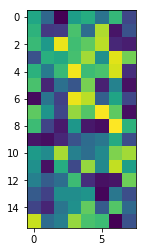

In [5]:
plt.imshow(A)

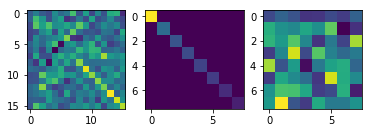

In [6]:
plt.subplot(1,3,1)
plt.imshow(U)
plt.subplot(1,3,2)
plt.imshow(np.diag(s))
plt.subplot(1,3,3)
plt.imshow(Vt)

In [7]:
#svd压缩还原 选择前1，3，5维
selt = [1,3,5]
out = []
for dim in selt:
    sigma = np.diag(s[:dim])
    Ud = U[:,:dim]
    Vtd = Vt[:dim]
    As = np.dot(np.dot(Ud,sigma),Vtd)
    out.append(As)


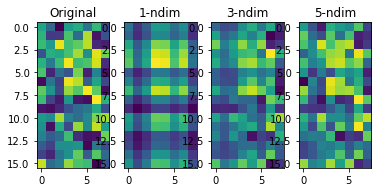

In [8]:
plt.subplot(1,4,1)
plt.title('Original')
plt.imshow(A)
plt.subplot(1,4,2)
plt.title("1-ndim")
plt.imshow(out[0])
plt.subplot(1,4,3)
plt.title("3-ndim")
plt.imshow(out[1])
plt.subplot(1,4,4)
plt.title("5-ndim")
plt.imshow(out[2])

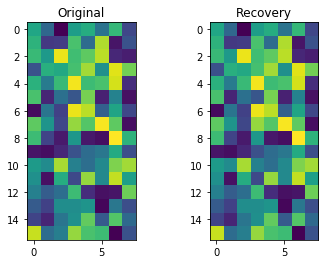

In [9]:
#完整还原
sigma = np.zeros((U.shape[0],Vt.shape[0]))
for i in range(len(s)):
    sigma[i,i] = s[i]
    
As = np.dot(np.dot(U,sigma),Vt)
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(A)
plt.subplot(1,2,2)
plt.title("Recovery")
plt.imshow(As)

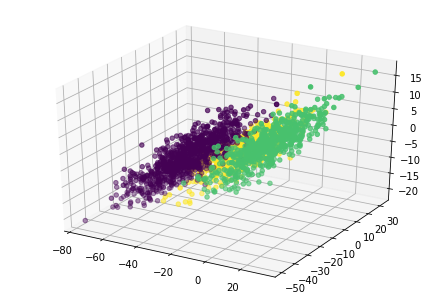

In [10]:
#PCA主成分分析-降维算法
A = np.random.randn(1900,2)
G1 = np.random.rand(400,1)
G2 = np.subtract(np.array([[2]*400]).T,G1)
G3 = np.random.rand(900,1)
G4 = np.subtract(np.array([[5]*900]).T,G3)
G5 = np.random.rand(600,1)
G6 = np.subtract(np.array([[1]*600]).T,G5)
G = np.concatenate((G1,G3,G5),axis=0)
Gn = np.concatenate((G2,G4,G6),axis=0)

A = np.concatenate((A,G),axis=1)
A = np.concatenate((A,Gn),axis=1)
label = [236]*400+[36]*900+[178]*600
trans = np.random.randint(-9,8,size=(4,4))

h = np.dot(A,trans)
#h = A
#h = np.concatenate((h,np.array([label]).T),axis=1)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(h[:,0],h[:,1],h[:,2],c=label)
plt.show()

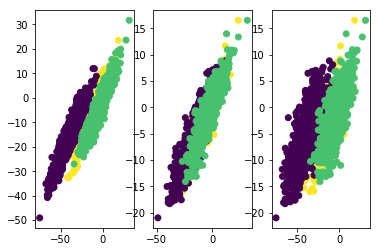

In [11]:
for i,(x,y) in enumerate([(0,1),(1,2),(0,2)]):#,(1,3),(0,3),(2,3)]):
    plt.subplot(1,3,i+1)
    plt.scatter(h[:,x],h[:,y],c=label)
plt.show()

In [12]:
pca = PCA()
s = pca.fit_transform(h)
s.shape

(1900, 4)

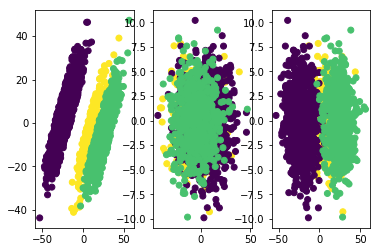

In [13]:
for i,(x,y) in enumerate([(0,1),(1,2),(0,2)]):
    plt.subplot(1,3,i+1)
    plt.scatter(s[:,x],s[:,y],c=label)
plt.show()

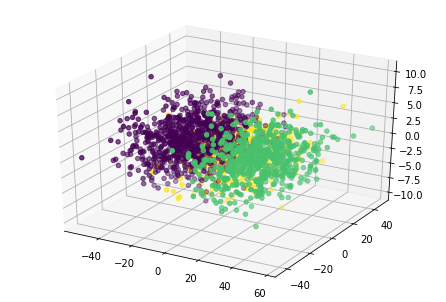

In [14]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(s[:,0],s[:,1],s[:,2],c=label)
plt.show()

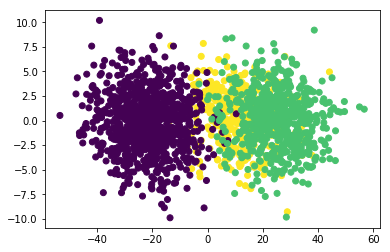

In [15]:
plt.scatter(s[:,0],s[:,2],c=label)

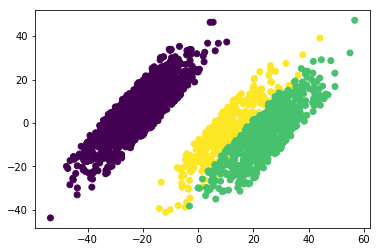

In [16]:
pca = PCA(n_components=2)
s = pca.fit_transform(h)
plt.scatter(s[:,0],s[:,1],c=label)

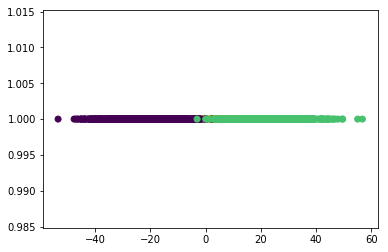

In [19]:
pca = PCA(n_components=1)
s = pca.fit_transform(h)
plt.scatter(s[:,0],[1]*1900,c=label)

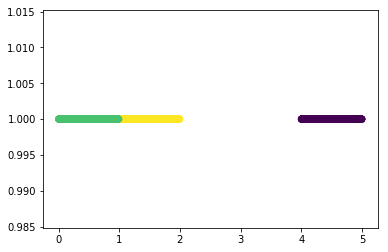

In [20]:
plt.scatter(A[:,3],[1]*1900,c=label)